# Create Database and Table

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Create or connect to the database
connection = sqlite3.connect('student_data.db')
cursor = connection.cursor()


# Create Table for Student Scores

In [5]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS student_scores (
    id INTEGER PRIMARY KEY,
    name TEXT,
    subject TEXT,
    score INTEGER
)
''')

connection.commit()


# Insert Student Data

In [8]:
# Insert Student data (custom names)
data = [
    ('Anjali', 'Math', 85),
    ('Ujjwal', 'Science', 78),
    ('Damanti', 'Science', 92),
    ('Rubel', 'Math', 88),
    ('Mihir', 'Math', 75),
    ('Surbhi', 'Science', 81)
]

# Insert new data
cursor.executemany('INSERT INTO student_scores (name, subject, score) VALUES (?, ?, ?)', data)

connection.commit()


# View All Records

In [11]:
# Fetching the data using sql query

cursor.execute('SELECT * FROM student_scores')
rows = cursor.fetchall()

print("All Student Records:")
for row in rows:
    print(row)


All Student Records:
(1, 'Anjali', 'Math', 85)
(2, 'Ujjwal', 'Science', 78)
(3, 'Damanti', 'Science', 92)
(4, 'Rubel', 'Math', 88)
(5, 'Mihir', 'Math', 75)
(6, 'Surbhi', 'Science', 81)


In [44]:
print(data)

[('Anjali', 'Math', 85), ('Ujjwal', 'Science', 78), ('Damanti', 'Science', 92), ('Rubel', 'Math', 88), ('Mihir', 'Math', 75), ('Surbhi', 'Science', 81)]


In [46]:
print("Name     | Subject   | Score")
print("-----------------------------")
for name, subject, score in data:
    print(f"{name:<8} | {subject:<9} | {score}")


Name     | Subject   | Score
-----------------------------
Anjali   | Math      | 85
Ujjwal   | Science   | 78
Damanti  | Science   | 92
Rubel    | Math      | 88
Mihir    | Math      | 75
Surbhi   | Science   | 81


# Total Score of All Students

In [14]:
cursor.execute('SELECT SUM(score) FROM student_scores')
total_score = cursor.fetchone()[0]

print("\nTotal Score of All Students:", total_score)



Total Score of All Students: 499


# Average Score per Subject using Pandas

In [18]:
query = '''
SELECT subject, AVG(score) AS avg_score
FROM student_scores
GROUP BY subject
'''

df = pd.read_sql_query(query, connection)

print("\nAverage Score by Subject:")
print(df)



Average Score by Subject:
   subject  avg_score
0     Math  82.666667
1  Science  83.666667


# Bar Chart – Average Score by Subject

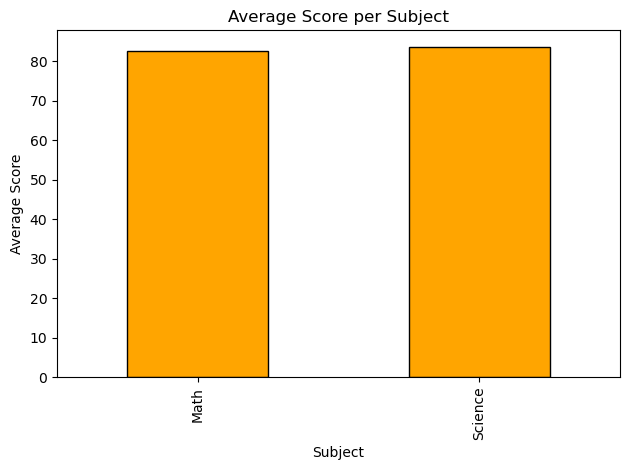

In [21]:
df.plot(kind='bar', x='subject', y='avg_score', color='orange', legend=False, edgecolor = 'black')
plt.xlabel('Subject')
plt.ylabel('Average Score')
plt.title('Average Score per Subject')
plt.tight_layout()
plt.show()


# Pie Chart – Subject-wise Score Distribution

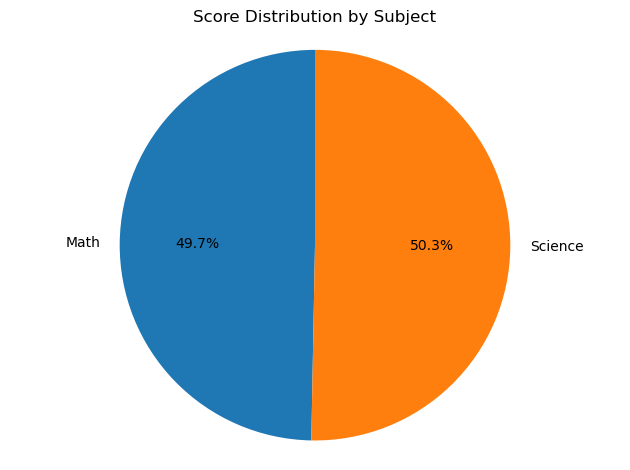

In [26]:
plt.pie(df['avg_score'], labels=df['subject'], autopct='%1.1f%%', startangle=90)
plt.title('Score Distribution by Subject')
plt.axis('equal')
plt.tight_layout()
plt.show()


# Line Chart – Score Trend

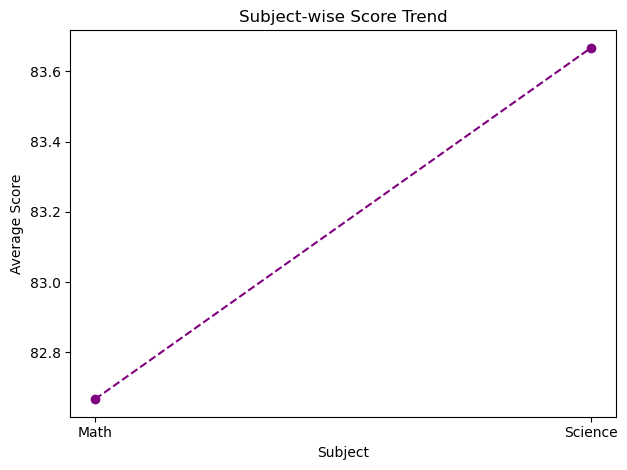

In [37]:
plt.plot(df['subject'], df['avg_score'], marker='o', linestyle='--', color='purple')
plt.xlabel('Subject')
plt.ylabel('Average Score')
plt.title('Subject-wise Score Trend')
plt.tight_layout()
plt.show()


In [39]:
# Step: Fetch all student data from database into df_all
query_all = 'SELECT * FROM student_scores'
df_all = pd.read_sql_query(query_all, connection)


# Box Plot for score distribution per subject

<Figure size 700x500 with 0 Axes>

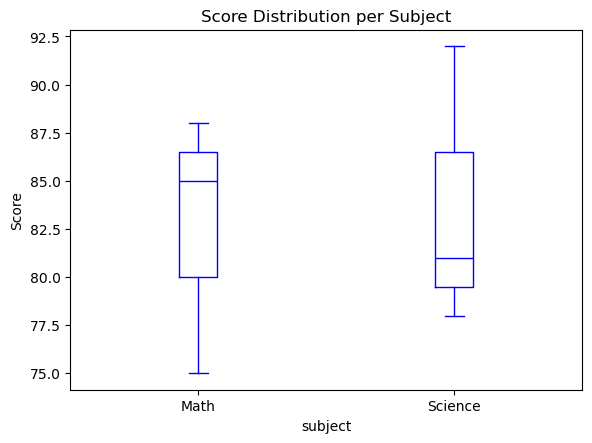

In [41]:
plt.figure(figsize=(7,5))
df_all.boxplot(by='subject', column='score', grid=False, color='blue')
plt.title('Score Distribution per Subject')
plt.suptitle('')
plt.ylabel('Score')
plt.show()


# Step 8: Close the database connection

In [6]:
connection.close()

***